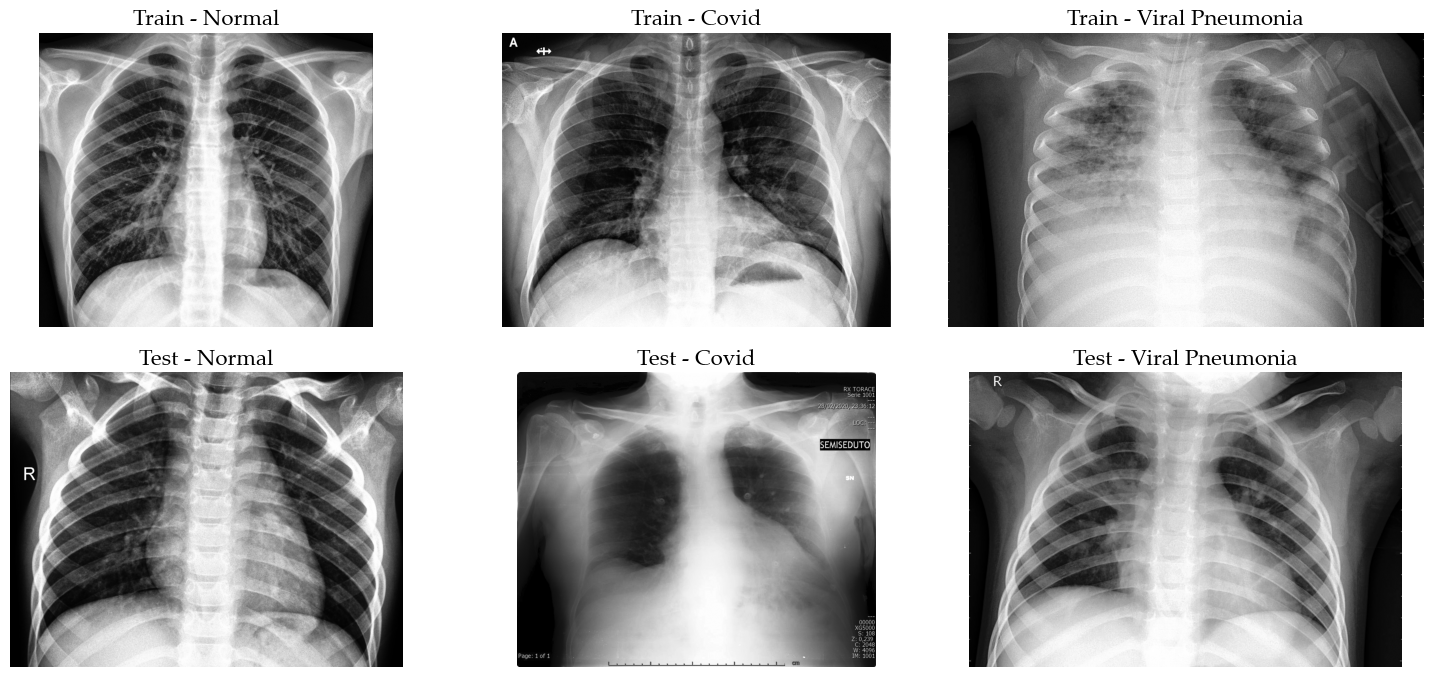

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Set global font sizes using rcParams to have similar looking graphs and plots
plt.rcParams['font.size'] = 14  # General font size
plt.rcParams['axes.titlesize'] = 16  # Title font size
plt.rcParams['axes.labelsize'] = 14  # Axis label font size
plt.rcParams['xtick.labelsize'] = 12  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 12  # Y-axis tick label font size
plt.rc('font', family='serif', serif=['Palatino Linotype'])


# Set up
data_dir = 'Covid19-dataset'
splits = ['train', 'test']
classes = ['Normal', 'Covid', 'Viral Pneumonia']

# Number of samples to show per class
n_samples = 1  # You can increase this if you want more images per class

fig, axs = plt.subplots(2, len(classes), figsize=(5*len(classes), 7))

for row, split in enumerate(splits):
    for col, cls in enumerate(classes):
        folder = os.path.join(data_dir, split, cls)
        img_files = [f for f in os.listdir(folder) if not f.startswith('.')]
        # Randomly select an image
        img_file = np.random.choice(img_files)
        img_path = os.path.join(folder, img_file)
        img = Image.open(img_path).convert('L')
        axs[row, col].imshow(img, cmap='gray')
        axs[row, col].axis('off')
        axs[row, col].set_title(f"{split.capitalize()} - {cls}", fontsize=16)

plt.tight_layout()
plt.show()


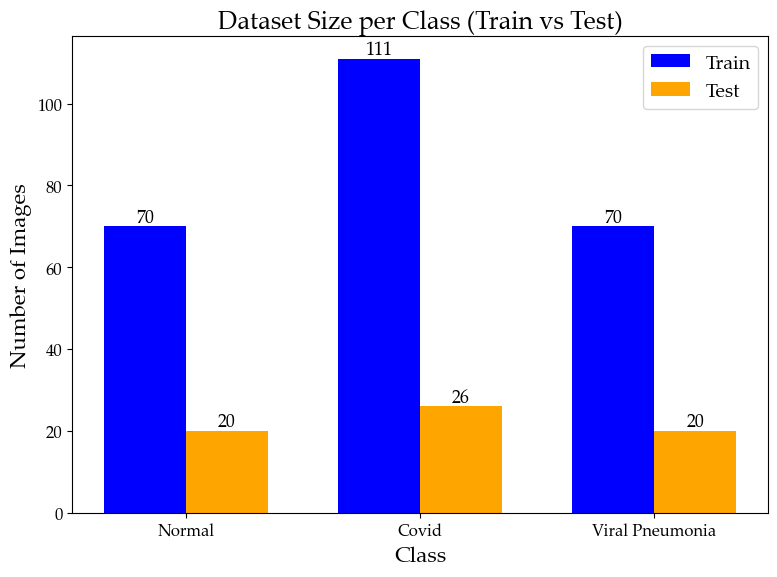

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Function to count images in each class folder
def count_images(folder):
    return {cls: len(os.listdir(os.path.join(folder, cls)))
            for cls in os.listdir(folder) if os.path.isdir(os.path.join(folder, cls))}

# Count images in train and test folders
train_counts = count_images('Covid19-dataset/train')
test_counts = count_images('Covid19-dataset/test')

# Ensure consistent class order
class_order = ['Normal', 'Covid', 'Viral Pneumonia']
train_values = [train_counts.get(cls, 0) for cls in class_order]
test_values = [test_counts.get(cls, 0) for cls in class_order]

# Bar width and positions
bar_width = 0.35
x = np.arange(len(class_order))

# Create single bar chart with grouped bars
fig, ax = plt.subplots(figsize=(8,6))
bars1 = ax.bar(x - bar_width/2, train_values, bar_width, label='Train', color='blue')
bars2 = ax.bar(x + bar_width/2, test_values, bar_width, label='Test', color='orange')

# Add counts on top of bars
for i, v in enumerate(train_values):
    ax.text(x[i] - bar_width/2, v + max(train_values + test_values)*0.01, str(v), ha='center', fontsize=13)
for i, v in enumerate(test_values):
    ax.text(x[i] + bar_width/2, v + max(train_values + test_values)*0.01, str(v), ha='center', fontsize=13)

ax.set_xlabel('Class', fontsize=16)
ax.set_ylabel('Number of Images', fontsize=16)
ax.set_title('Dataset Size per Class (Train vs Test)', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(class_order)
ax.legend()
plt.tight_layout()
plt.show()


In [3]:
import os
from PIL import Image
import numpy as np
import cv2

# Define input and output directories
input_root = 'Covid19-dataset'
output_root = 'Covid19-dataset-processed'
splits = ['train', 'test']
classes = ['Normal', 'Covid', 'Viral Pneumonia']

def enhance_contrast(img):
    arr = np.array(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return Image.fromarray(clahe.apply(arr))

def preprocess_and_save(img_path, save_path):
    img = Image.open(img_path).convert('L')  # Grayscale
    img = img.resize((224, 224), Image.BILINEAR)
    img = enhance_contrast(img)
    arr = np.array(img).astype(np.float32) / 255.0  # Normalize to [0,1]
    img = Image.fromarray(np.uint8(arr * 255))
    img.save(save_path)

for split in splits:
    for cls in classes:
        in_dir = os.path.join(input_root, split, cls)
        out_dir = os.path.join(output_root, split, cls)
        os.makedirs(out_dir, exist_ok=True)
        for fname in os.listdir(in_dir):
            if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
                in_path = os.path.join(in_dir, fname)
                out_path = os.path.join(out_dir, fname)
                preprocess_and_save(in_path, out_path)

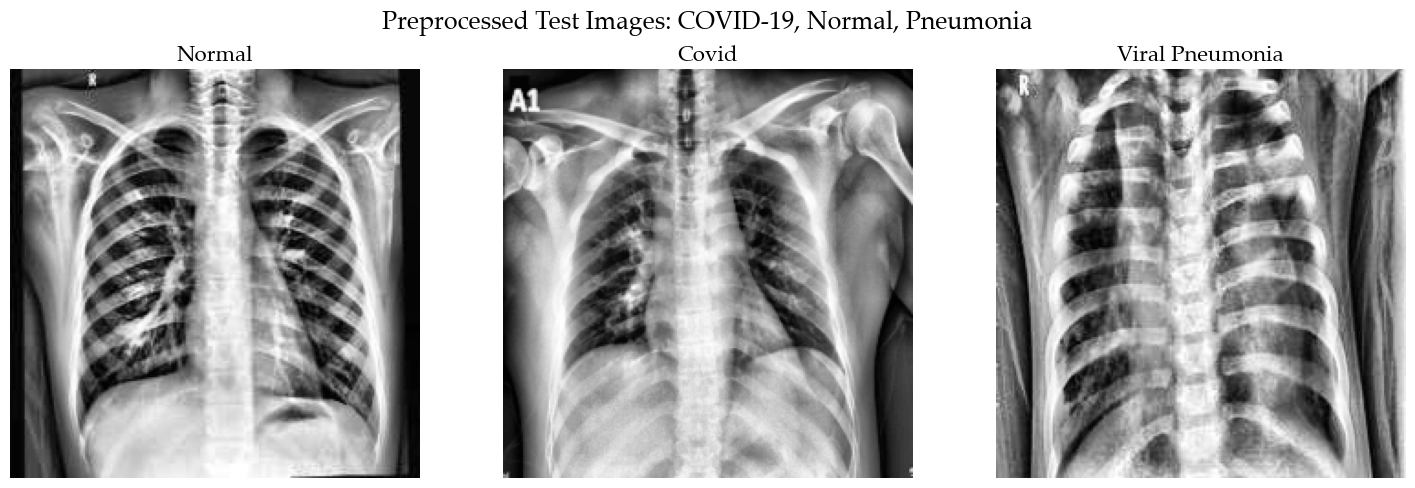

In [4]:
base_dir = 'Covid19-dataset-processed'

# Preprocessing function as per research
def preprocess_image(img_path):
    img = Image.open(img_path).convert('L')  # Grayscale
    img = img.resize((224, 224), Image.BILINEAR)
    arr = np.array(img)
    # Adaptive histogram equalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    arr_eq = clahe.apply(arr)
    # Normalize to [0, 1]
    arr_norm = arr_eq / 255.0
    return arr_norm

plt.figure(figsize=(15,5))
for i, cls in enumerate(classes):
    folder = os.path.join(base_dir, split, cls)
    img_files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    img_path = os.path.join(folder, np.random.choice(img_files))
    img = preprocess_image(img_path)
    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(cls, fontsize=16)
    plt.axis('off')
plt.suptitle(f'Preprocessed {split.capitalize()} Images: COVID-19, Normal, Pneumonia', fontsize=18)
plt.tight_layout()
plt.show()

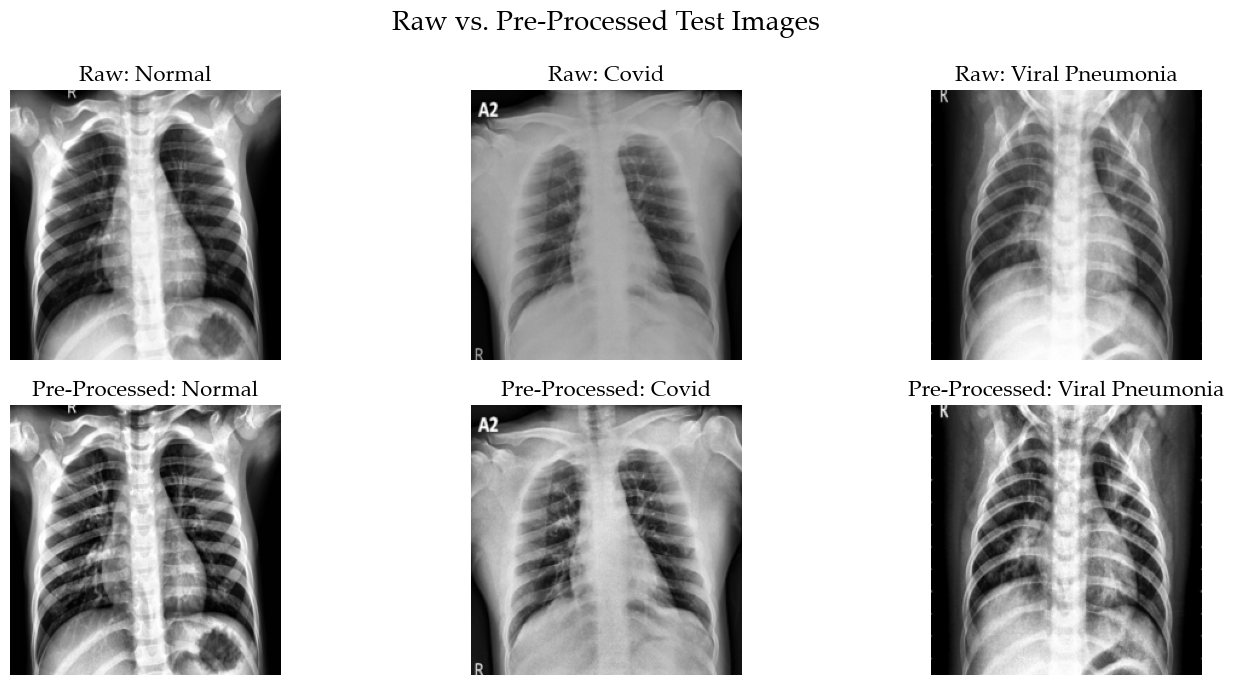

In [5]:
# Define paths
test_dir = 'Covid19-dataset/test'
classes = ['Normal', 'Covid', 'Viral Pneumonia']  # New order

def preprocess_image(img_path):
    img = Image.open(img_path).convert('L')
    img = img.resize((224, 224), Image.BILINEAR)
    arr = np.array(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    arr_eq = clahe.apply(arr)
    return arr, arr_eq

fig, axs = plt.subplots(2, len(classes), figsize=(5*len(classes), 7))

for col, cls in enumerate(classes):
    folder = os.path.join(test_dir, cls)
    img_files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    img_path = os.path.join(folder, np.random.choice(img_files))
    raw, processed = preprocess_image(img_path)

    # Raw image
    axs[0, col].imshow(raw, cmap='gray')
    axs[0, col].set_title(f'Raw: {cls}', fontsize=16)
    axs[0, col].axis('off')

    # Pre-processed image
    axs[1, col].imshow(processed, cmap='gray')
    axs[1, col].set_title(f'Pre-Processed: {cls}', fontsize=16)
    axs[1, col].axis('off')

plt.suptitle('Raw vs. Pre-Processed Test Images', fontsize=20)
plt.tight_layout()
plt.show()


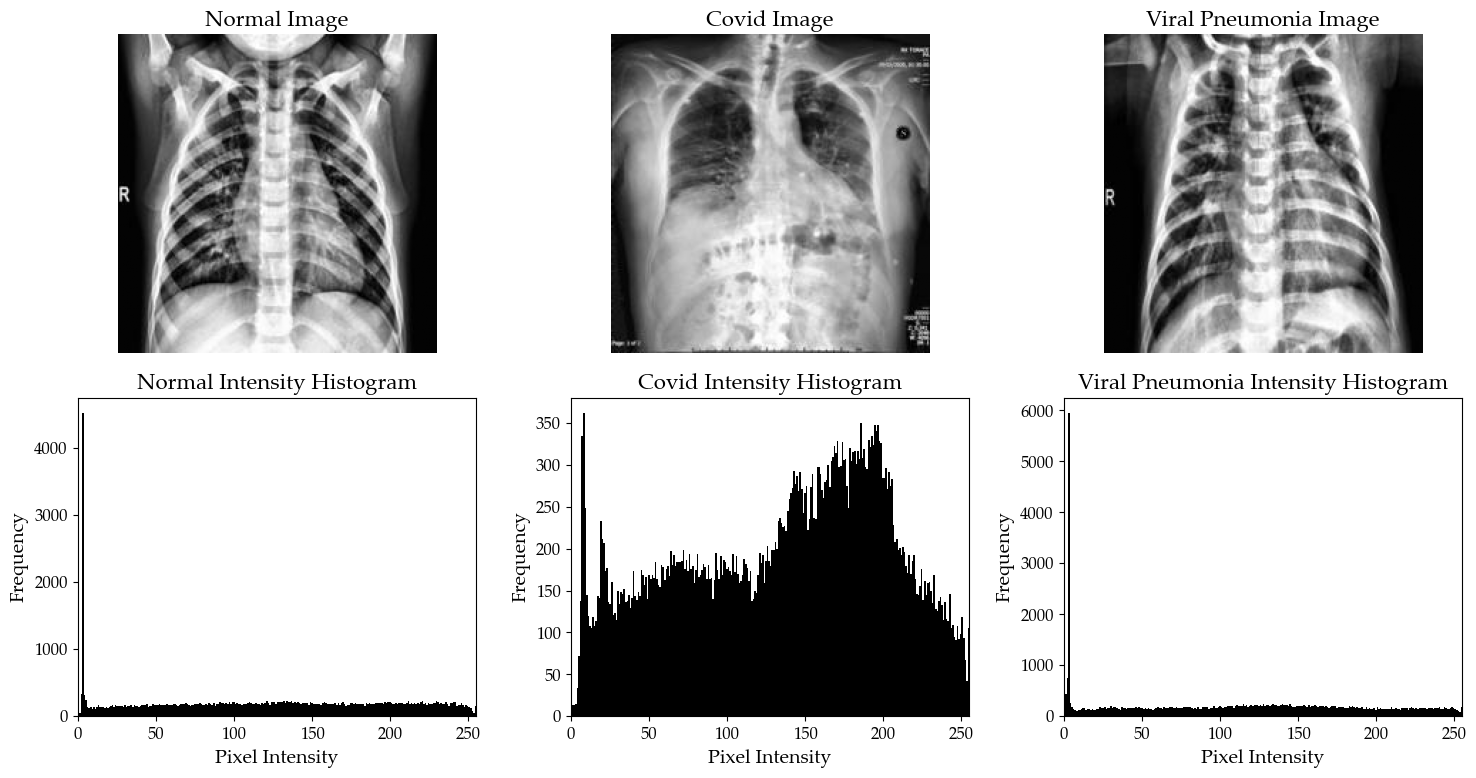

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming 'classes' is a predefined list of class names and 'base_dir' and 'split' are defined
def load_image(image_path):
    return np.array(Image.open(image_path).convert('L'))  # Convert to grayscale

fig, axs = plt.subplots(2, len(classes), figsize=(5*len(classes), 8))

for col, cls in enumerate(classes):
    folder = os.path.join(base_dir, split, cls)
    img_files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    img_path = os.path.join(folder, np.random.choice(img_files))
    img = load_image(img_path)

    # First row: display the image
    axs[0, col].imshow(img, cmap='gray')
    axs[0, col].set_title(f'{cls} Image', fontsize=16)
    axs[0, col].axis('off')

    # Second row: display the histogram
    axs[1, col].hist(img.ravel(), bins=256, range=(0, 255), color='black')
    axs[1, col].set_title(f'{cls} Intensity Histogram', fontsize=16)
    axs[1, col].set_xlim([0, 255])
    axs[1, col].set_xlabel('Pixel Intensity')
    axs[1, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Training

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, callbacks

# Paths
train_dir = 'Covid19-dataset-processed/train'
# val_dir = 'Covid19-dataset-processed/test'
img_size = (224, 224)
batch_size = 32
num_classes = 3

# Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
# val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)
# val_gen = val_datagen.flow_from_directory(
#     val_dir,
#     target_size=img_size,
#     color_mode='grayscale',
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# CNN model (inspired by Alharbi et al. 2022)
cnn_model = models.Sequential([
    layers.Input(shape=(224, 224, 1)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for best model saving and early stopping
cb = [
    callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_accuracy', mode='max'),
    callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)
]

# Training
history = cnn_model.fit(
    train_gen,
    epochs=50,
    # validation_data=val_gen,
    callbacks=cb
)


Found 251 images belonging to 3 classes.
Epoch 1/50
8/8 [==============================] - 3s 334ms/step - loss: 1.0874 - accuracy: 0.4303
Epoch 2/50
8/8 [==============================] - 3s 333ms/step - loss: 1.0407 - accuracy: 0.5060
Epoch 3/50
8/8 [==============================] - 3s 340ms/step - loss: 0.9815 - accuracy: 0.5020
Epoch 4/50
8/8 [==============================] - 3s 344ms/step - loss: 0.8734 - accuracy: 0.6295
Epoch 5/50
8/8 [==============================] - 3s 347ms/step - loss: 0.7696 - accuracy: 0.6574
Epoch 6/50
8/8 [==============================] - 3s 348ms/step - loss: 0.6838 - accuracy: 0.7131
Epoch 7/50
8/8 [==============================] - 3s 343ms/step - loss: 0.5942 - accuracy: 0.7371
Epoch 8/50
8/8 [==============================] - 3s 354ms/step - loss: 0.5725 - accuracy: 0.7450
Epoch 9/50
8/8 [==============================] - 3s 347ms/step - loss: 0.5770 - accuracy: 0.7490
Epoch 10/50
8/8 [==============================] - 3s 345ms/step - loss: 0.46

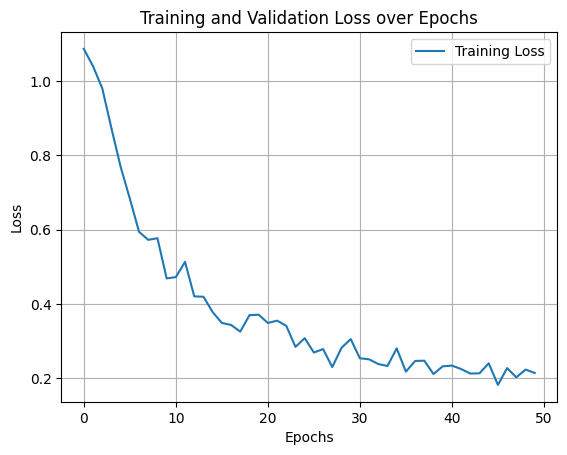

In [2]:
import matplotlib.pyplot as plt

# Plot validation loss vs epochs
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Load the best saved model
cnn_model = tf.keras.models.load_model('best_cnn_model.h5')

val_dir = 'Covid19-dataset-processed/test'
val_datagen = ImageDataGenerator(rescale=1./255)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate the model on the test data generator
results = cnn_model.evaluate(val_gen)

# Extract loss and accuracy
loss, accuracy = results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Found 66 images belonging to 3 classes.
3/3 [==============================] - 0s 41ms/step - loss: 0.2590 - accuracy: 0.9091
Test Loss: 0.2590
Test Accuracy: 0.9091


Found 66 images belonging to 3 classes.
3/3 [==============================] - 0s 37ms/step


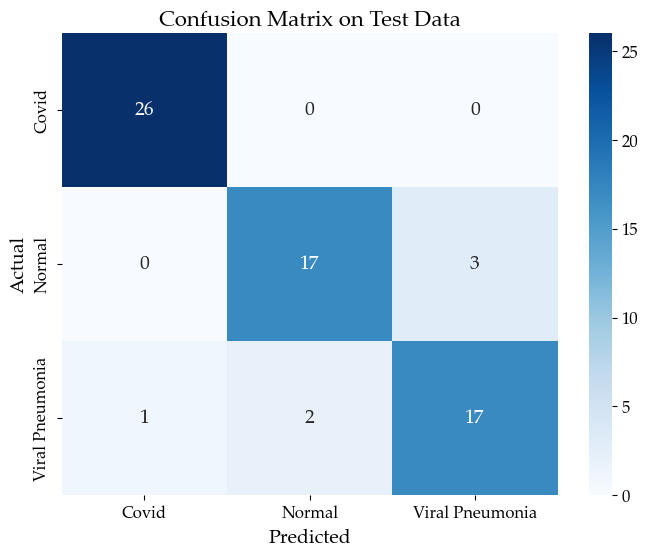

                 precision    recall  f1-score   support

          Covid       0.96      1.00      0.98        26
         Normal       0.89      0.85      0.87        20
Viral Pneumonia       0.85      0.85      0.85        20

       accuracy                           0.91        66
      macro avg       0.90      0.90      0.90        66
   weighted avg       0.91      0.91      0.91        66



In [11]:
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # <--- IMPORTANT
)

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict class probabilities
Y_pred = cnn_model.predict(val_gen)
# Get predicted class indices
y_pred = np.argmax(Y_pred, axis=1)
# Get true class indices
y_true = val_gen.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
class_names = list(val_gen.class_indices.keys())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))


## Resnet-18

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os

# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [16]:
# Preprocessing and augmentation (as in research)
img_size = 224

train_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Add this line
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485], [0.229])
])

test_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Add this line
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485], [0.229])
])


data_dir = 'Covid19-dataset-processed'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)


In [17]:
resnet_model = models.resnet18(pretrained=True)
resnet_model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs, 3)  # 3 classes
resnet_model = resnet_model.to(device)


c:\Users\CM_PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\CM_PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
train_losses = []
best_loss = float('inf')
best_model_path = 'best_model.pth'

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.parameters(), lr=1e-4)
epochs = 50

for epoch in range(epochs):
    resnet_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total
    train_losses.append(train_loss)

    # Save the best model
    if train_loss < best_loss:
        best_loss = train_loss
        torch.save(resnet_model.state_dict(), best_model_path)
        print(f"Epoch {epoch+1}: Best model saved with loss {best_loss:.4f}")

    print(f"Epoch {epoch+1}/{epochs} | Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")



Epoch 1: Best model saved with loss 0.6534
Epoch 1/50 | Loss: 0.6534 | Acc: 0.7490
Epoch 2: Best model saved with loss 0.1758
Epoch 2/50 | Loss: 0.1758 | Acc: 0.9482
Epoch 3: Best model saved with loss 0.0775
Epoch 3/50 | Loss: 0.0775 | Acc: 0.9761
Epoch 4/50 | Loss: 0.0803 | Acc: 0.9641
Epoch 5/50 | Loss: 0.1092 | Acc: 0.9681
Epoch 6: Best model saved with loss 0.0235
Epoch 6/50 | Loss: 0.0235 | Acc: 1.0000
Epoch 7: Best model saved with loss 0.0219
Epoch 7/50 | Loss: 0.0219 | Acc: 0.9960
Epoch 8/50 | Loss: 0.0333 | Acc: 0.9920
Epoch 9: Best model saved with loss 0.0197
Epoch 9/50 | Loss: 0.0197 | Acc: 0.9960
Epoch 10: Best model saved with loss 0.0080
Epoch 10/50 | Loss: 0.0080 | Acc: 1.0000
Epoch 11/50 | Loss: 0.0121 | Acc: 1.0000
Epoch 12/50 | Loss: 0.0090 | Acc: 1.0000
Epoch 13: Best model saved with loss 0.0037
Epoch 13/50 | Loss: 0.0037 | Acc: 1.0000
Epoch 14/50 | Loss: 0.0125 | Acc: 1.0000
Epoch 15/50 | Loss: 0.0080 | Acc: 1.0000
Epoch 16/50 | Loss: 0.0066 | Acc: 1.0000
Epoch 1

In [9]:
best_model_path = 'best_model.pth'
resnet_model.load_state_dict(torch.load(best_model_path))
print("Best model loaded from disk.")


Best model loaded from disk.


C:\Users\CM_PC\AppData\Local\Temp\ipykernel_15388\2646768222.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_model.load_state_dict(torch.load(best_model_path))


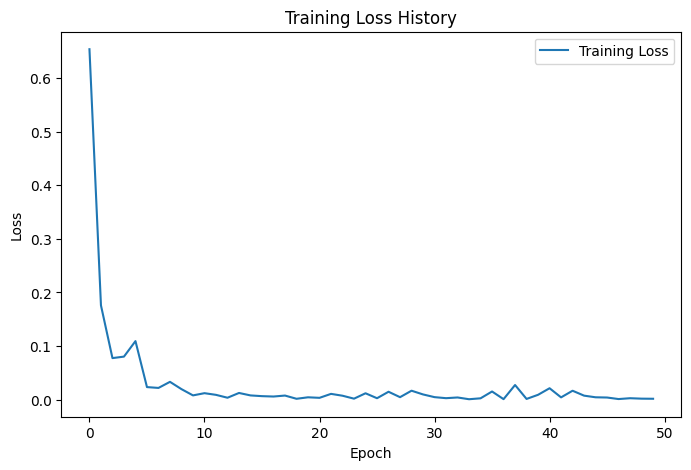

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.legend()
plt.show()


Creating and loading ResNet model...
ResNet model created and best weights loaded


c:\Users\CM_PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\CM_PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\CM_PC\AppData\Local\Temp\ipykernel_16388\3045204197.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpick

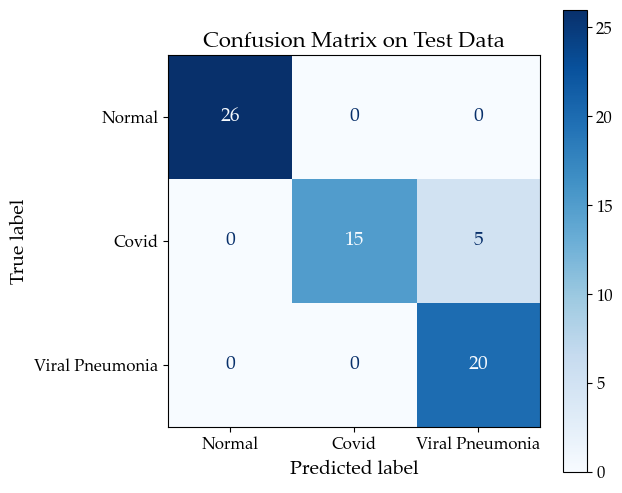

                 precision    recall  f1-score   support

         Normal       1.00      1.00      1.00        26
          Covid       1.00      0.75      0.86        20
Viral Pneumonia       0.80      1.00      0.89        20

       accuracy                           0.92        66
      macro avg       0.93      0.92      0.92        66
   weighted avg       0.94      0.92      0.92        66



In [54]:
# Ensure ResNet model is properly defined and loaded
try:
    # Check if resnet_model exists and has been loaded
    resnet_model
    print("ResNet model is already defined")
except NameError:
    # If not defined, create and load the ResNet model
    print("Creating and loading ResNet model...")
    resnet_model = models.resnet18(pretrained=True)
    resnet_model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    num_ftrs = resnet_model.fc.in_features
    resnet_model.fc = nn.Linear(num_ftrs, 3)  # 3 classes
    resnet_model = resnet_model.to(device)
    
    # Load the best model weights
    resnet_model.load_state_dict(torch.load('best_model.pth'))
    print("ResNet model created and best weights loaded")

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Set your class order (as used in your dataset and model)
class_names = ['Normal', 'Covid', 'Viral Pneumonia']

# Collect predictions and true labels
resnet_model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet_model(inputs)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Test Data')
plt.show()

# Print classification report for detailed metrics
print(classification_report(y_true, y_pred, target_names=class_names))


# Vision Transformer (ViT)

Implementing a Vision Transformer for COVID-19 chest X-ray classification. ViT treats images as sequences of patches and applies transformer architecture for classification.

In [7]:
import math
import torch.nn.functional as F
from torch.nn import MultiheadAttention
from einops import rearrange, repeat
from einops.layers.torch import Rearrange

# Install einops if not available
try:
    import einops
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "einops"])
    import einops
    from einops import rearrange, repeat
    from einops.layers.torch import Rearrange

In [8]:
import torch.nn as nn

class PatchEmbedding(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=1, embed_dim=768):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.n_patches = (img_size // patch_size) ** 2
        
        # Patch embedding using convolution
        self.patch_embed = nn.Conv2d(
            in_channels, embed_dim, 
            kernel_size=patch_size, 
            stride=patch_size
        )
        
    def forward(self, x):
        # x: (batch_size, channels, height, width)
        x = self.patch_embed(x)  # (batch_size, embed_dim, n_patches_sqrt, n_patches_sqrt)
        x = x.flatten(2)  # (batch_size, embed_dim, n_patches)
        x = x.transpose(1, 2)  # (batch_size, n_patches, embed_dim)
        return x

In [9]:
class AttentionBlock(nn.Module):
    def __init__(self, embed_dim=768, num_heads=12, dropout=0.1):
        super().__init__()
        self.attention = MultiheadAttention(
            embed_dim, num_heads, dropout=dropout, batch_first=True
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        
        # MLP block
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim, embed_dim * 4),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(embed_dim * 4, embed_dim),
            nn.Dropout(dropout)
        )
        
    def forward(self, x):
        # Self-attention with residual connection
        attn_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attn_out)
        
        # MLP with residual connection
        mlp_out = self.mlp(x)
        x = self.norm2(x + mlp_out)
        
        return x

In [10]:
class VisionTransformer(nn.Module):
    def __init__(
        self, 
        img_size=224, 
        patch_size=16, 
        in_channels=1, 
        num_classes=3,
        embed_dim=768, 
        num_layers=12, 
        num_heads=12, 
        dropout=0.1
    ):
        super().__init__()
        
        # Patch embedding
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        n_patches = self.patch_embed.n_patches
        
        # Class token and position embeddings
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, n_patches + 1, embed_dim))
        
        # Transformer blocks
        self.transformer_blocks = nn.ModuleList([
            AttentionBlock(embed_dim, num_heads, dropout)
            for _ in range(num_layers)
        ])
        
        # Classification head
        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)
        self.dropout = nn.Dropout(dropout)
        
        # Initialize weights
        self.init_weights()
        
    def init_weights(self):
        # Initialize position embeddings
        nn.init.trunc_normal_(self.pos_embed, std=0.02)
        nn.init.trunc_normal_(self.cls_token, std=0.02)
        
        # Initialize linear layers
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.trunc_normal_(m.weight, std=0.02)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
    
    def forward(self, x):
        batch_size = x.shape[0]
        
        # Patch embedding
        x = self.patch_embed(x)  # (batch_size, n_patches, embed_dim)
        
        # Add class token
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        x = torch.cat([cls_tokens, x], dim=1)  # (batch_size, n_patches + 1, embed_dim)
        
        # Add position embeddings
        x = x + self.pos_embed
        x = self.dropout(x)
        
        # Transformer blocks
        for block in self.transformer_blocks:
            x = block(x)
        
        # Final layer norm
        x = self.norm(x)
        
        # Classification using class token
        cls_token_final = x[:, 0]  # (batch_size, embed_dim)
        out = self.head(cls_token_final)
        
        return out

In [11]:
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create ViT model with smaller configuration suitable for medical imaging
vit_model = VisionTransformer(
    img_size=224,
    patch_size=16,  # 16x16 patches
    in_channels=1,  # Grayscale
    num_classes=3,  # Normal, Covid, Viral Pneumonia
    embed_dim=384,  # Smaller embedding dimension
    num_layers=6,   # Fewer layers to reduce complexity
    num_heads=6,    # Fewer attention heads
    dropout=0.1
).to(device)

# Count parameters
total_params = sum(p.numel() for p in vit_model.parameters())
trainable_params = sum(p.numel() for p in vit_model.parameters() if p.requires_grad)

print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Model size: {total_params * 4 / 1024**2:.2f} MB")

Total parameters: 10,823,427
Trainable parameters: 10,823,427
Model size: 41.29 MB


In [12]:
# Test the model with a sample input
with torch.no_grad():
    sample_input = torch.randn(2, 1, 224, 224).to(device)
    output = vit_model(sample_input)
    print(f"Input shape: {sample_input.shape}")
    print(f"Output shape: {output.shape}")
    print(f"Output logits sample: {output[0]}")

Input shape: torch.Size([2, 1, 224, 224])
Output shape: torch.Size([2, 3])
Output logits sample: tensor([-0.3951, -0.7634, -0.2119], device='cuda:0')


In [18]:
import torch.optim as optim
# Training configuration for ViT
vit_criterion = nn.CrossEntropyLoss()
vit_optimizer = optim.AdamW(vit_model.parameters(), lr=5e-5, weight_decay=0.05)
vit_scheduler = optim.lr_scheduler.CosineAnnealingLR(vit_optimizer, T_max=20)

vit_train_losses = []
vit_train_accuracies = []
best_vit_loss = float('inf')
best_vit_model_path = 'best_vit_model.pth'

print("Starting ViT training...")
epochs = 50

for epoch in range(epochs):
    vit_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        vit_optimizer.zero_grad()
        outputs = vit_model(inputs)
        loss = vit_criterion(outputs, labels)
        loss.backward()
        
        # Gradient clipping for stability
        torch.nn.utils.clip_grad_norm_(vit_model.parameters(), max_norm=1.0)
        
        vit_optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        if batch_idx % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Batch {batch_idx}/{len(train_loader)}, '
                  f'Loss: {loss.item():.4f}')
    
    vit_scheduler.step()
    
    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total
    vit_train_losses.append(train_loss)
    vit_train_accuracies.append(train_acc)
    
    # Save the best model
    if train_loss < best_vit_loss:
        best_vit_loss = train_loss
        torch.save(vit_model.state_dict(), best_vit_model_path)
        print(f"Epoch {epoch+1}: Best ViT model saved with loss {best_vit_loss:.4f}")
    
    print(f"Epoch {epoch+1}/{epochs} | Loss: {train_loss:.4f} | Acc: {train_acc:.4f} | LR: {vit_scheduler.get_last_lr()[0]:.6f}")
    print("-" * 60)

Starting ViT training...
Epoch 1/50, Batch 0/8, Loss: 1.1585
Epoch 1: Best ViT model saved with loss 0.9376
Epoch 1/50 | Loss: 0.9376 | Acc: 0.5339 | LR: 0.000050
------------------------------------------------------------
Epoch 2/50, Batch 0/8, Loss: 0.5924
Epoch 2: Best ViT model saved with loss 0.8842
Epoch 2/50 | Loss: 0.8842 | Acc: 0.5976 | LR: 0.000049
------------------------------------------------------------
Epoch 3/50, Batch 0/8, Loss: 0.8466
Epoch 3: Best ViT model saved with loss 0.8513
Epoch 3/50 | Loss: 0.8513 | Acc: 0.5618 | LR: 0.000047
------------------------------------------------------------
Epoch 4/50, Batch 0/8, Loss: 0.8728
Epoch 4: Best ViT model saved with loss 0.7950
Epoch 4/50 | Loss: 0.7950 | Acc: 0.6056 | LR: 0.000045
------------------------------------------------------------
Epoch 5/50, Batch 0/8, Loss: 0.6038
Epoch 5: Best ViT model saved with loss 0.7572
Epoch 5/50 | Loss: 0.7572 | Acc: 0.6096 | LR: 0.000043
-----------------------------------------

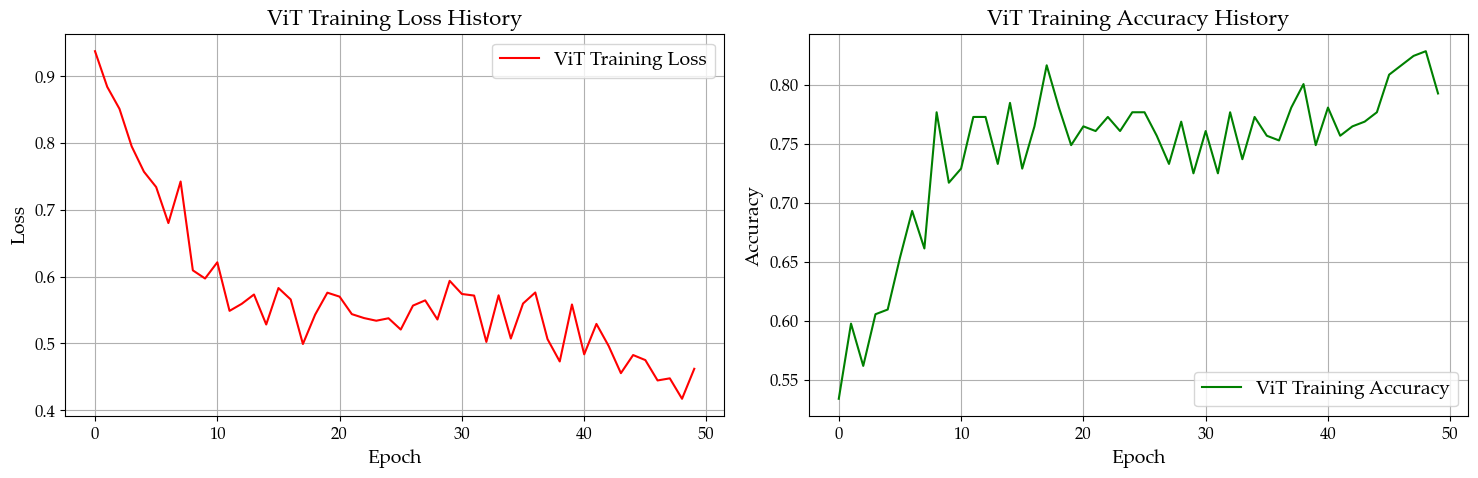

In [19]:
# Plot ViT training history
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(vit_train_losses, label='ViT Training Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ViT Training Loss History')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(vit_train_accuracies, label='ViT Training Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ViT Training Accuracy History')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [20]:
# Load the best ViT model
vit_model.load_state_dict(torch.load(best_vit_model_path))
print("Best ViT model loaded from disk.")

# Evaluate ViT on test data
vit_model.eval()
y_true_vit = []
y_pred_vit = []
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vit_model(inputs)
        loss = vit_criterion(outputs, labels)
        
        test_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        y_true_vit.extend(labels.cpu().numpy())
        y_pred_vit.extend(predicted.cpu().numpy())

test_loss = test_loss / len(test_loader.dataset)
test_accuracy = correct / total

print(f"ViT Test Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

C:\Users\CM_PC\AppData\Local\Temp\ipykernel_26808\1921178713.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vit_model.load_state_dict(torch.load(best_vit_model_path))


Best ViT model loaded from disk.
ViT Test Results:
Test Loss: 1.0701
Test Accuracy: 0.5909


In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# ViT Confusion matrix and classification report
cm_vit = confusion_matrix(y_true_vit, y_pred_vit)

# Plot ViT confusion matrix
disp_vit = ConfusionMatrixDisplay(confusion_matrix=cm_vit, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_vit.plot(ax=ax, cmap=plt.cm.Greens)
plt.title('ViT Confusion Matrix on Test Data', fontsize=16)
plt.show()

# Print ViT classification report
print("\nViT Classification Report:")
print(classification_report(y_true_vit, y_pred_vit, target_names=class_names))

NameError: name 'class_names' is not defined

In [51]:
# Model comparison
print("=" * 60)
print("MODEL COMPARISON SUMMARY")
print("=" * 60)

# Calculate ResNet accuracy from the loaded model
resnet_model.eval()
resnet_correct = 0
resnet_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet_model(inputs)
        _, predicted = outputs.max(1)
        resnet_total += labels.size(0)
        resnet_correct += predicted.eq(labels).sum().item()

resnet_accuracy = resnet_correct / resnet_total

print(f"ResNet-18 Test Accuracy: {resnet_accuracy:.4f}")
print(f"ViT Test Accuracy: {test_accuracy:.4f}")

print(f"\nAccuracy Difference: {abs(test_accuracy - resnet_accuracy):.4f}")
if test_accuracy > resnet_accuracy:
    print("ViT performs better than ResNet-18")
elif resnet_accuracy > test_accuracy:
    print("ResNet-18 performs better than ViT")
else:
    print("Both models perform equally")

# Model complexity comparison
resnet_params = sum(p.numel() for p in resnet_model.parameters())  # ResNet model
vit_params = sum(p.numel() for p in vit_model.parameters())

print(f"\nModel Complexity:")
print(f"ResNet-18 parameters: {resnet_params:,}")
print(f"ViT parameters: {vit_params:,}")
print(f"Parameter ratio (ViT/ResNet): {vit_params/resnet_params:.2f}x")

MODEL COMPARISON SUMMARY
ResNet-18 Test Accuracy: 0.9394
ViT Test Accuracy: 0.6818

Accuracy Difference: 0.2576
ResNet-18 performs better than ViT

Model Complexity:
ResNet-18 parameters: 11,171,779
ViT parameters: 10,823,427
Parameter ratio (ViT/ResNet): 0.97x
ResNet-18 Test Accuracy: 0.9394
ViT Test Accuracy: 0.6818

Accuracy Difference: 0.2576
ResNet-18 performs better than ViT

Model Complexity:
ResNet-18 parameters: 11,171,779
ViT parameters: 10,823,427
Parameter ratio (ViT/ResNet): 0.97x


In [52]:
# Check and ensure all required dependencies are available
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os

# Check device
try:
    device
    print(f"Device already defined: {device}")
except NameError:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Device set to: {device}")

# Check data loaders
try:
    test_loader
    print("Test loader already defined")
except NameError:
    print("Creating data loaders...")
    # Data transforms
    test_transforms = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485], [0.229])
    ])
    
    # Create test dataset and loader
    data_dir = 'Covid19-dataset-processed'
    test_dir = os.path.join(data_dir, 'test')
    test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
    print("Test loader created")

print("All dependencies are ready!")

Device already defined: cuda
Test loader already defined
All dependencies are ready!


In [28]:
# --- Plotting Configuration Section ---
import matplotlib.pyplot as plt
import numpy as np

# Plotting style and variables
PLOT_FONT = 'Palatino Linotype'
PLOT_TITLE_SIZE = 18
PLOT_LABEL_SIZE = 15
PLOT_TICK_SIZE = 13
PLOT_LEGEND_SIZE = 13
PLOT_FIGURE_FACECOLOR = '#f7f7f7'
PLOT_AXES_FACECOLOR = '#f7f7f7'
PLOT_AXES_EDGECOLOR = '#333333'
PLOT_GRID_LINESTYLE = '--'
PLOT_GRID_COLOR = '#cccccc'
PLOT_LOSS_COLOR = "#1f7bb4"
PLOT_BEST_EPOCH_COLOR = '#d62728'
PLOT_LOSS_LINESTYLE = '-'
PLOT_BEST_EPOCH_LINESTYLE = '--'
PLOT_LINEWIDTH = 2
PLOT_DPI = 120
PLOT_CIRCLE_SIZE = 120  # Size for scatter circle
PLOT_CIRCLE_EDGE_COLOR = '#d62728'
PLOT_CIRCLE_FACE_COLOR = '#ffffff'
PLOT_CIRCLE_LINEWIDTH = 2

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = [PLOT_FONT]
plt.rcParams['axes.titlesize'] = PLOT_TITLE_SIZE
plt.rcParams['axes.labelsize'] = PLOT_LABEL_SIZE
plt.rcParams['xtick.labelsize'] = PLOT_TICK_SIZE
plt.rcParams['ytick.labelsize'] = PLOT_TICK_SIZE
plt.rcParams['legend.fontsize'] = PLOT_LEGEND_SIZE
plt.rcParams['figure.facecolor'] = PLOT_FIGURE_FACECOLOR
plt.rcParams['axes.facecolor'] = PLOT_AXES_FACECOLOR
plt.rcParams['axes.edgecolor'] = PLOT_AXES_EDGECOLOR
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = PLOT_GRID_LINESTYLE
plt.rcParams['grid.color'] = PLOT_GRID_COLOR

# --- End Plotting Configuration Section ---

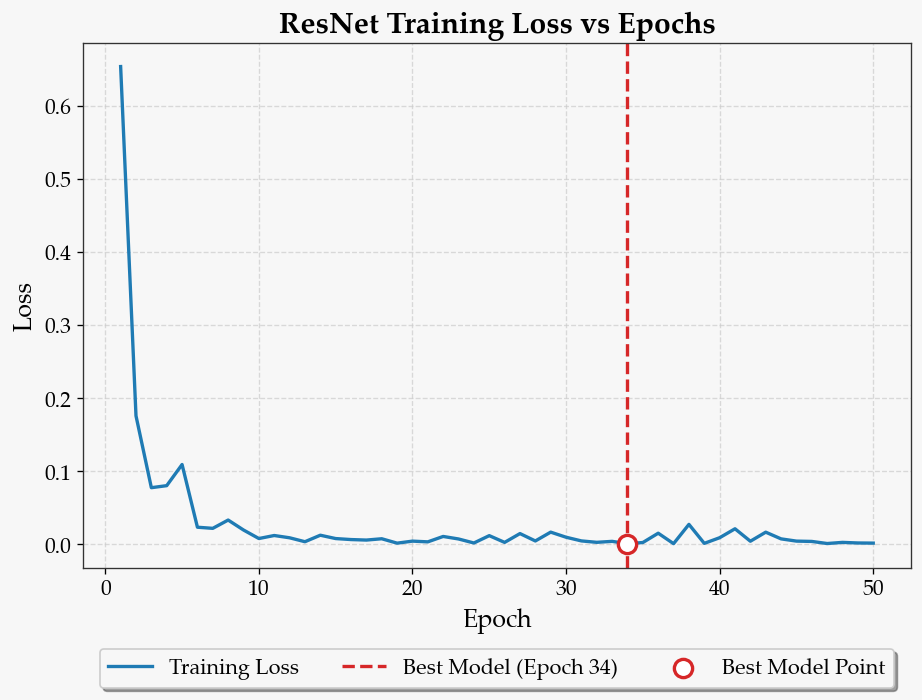

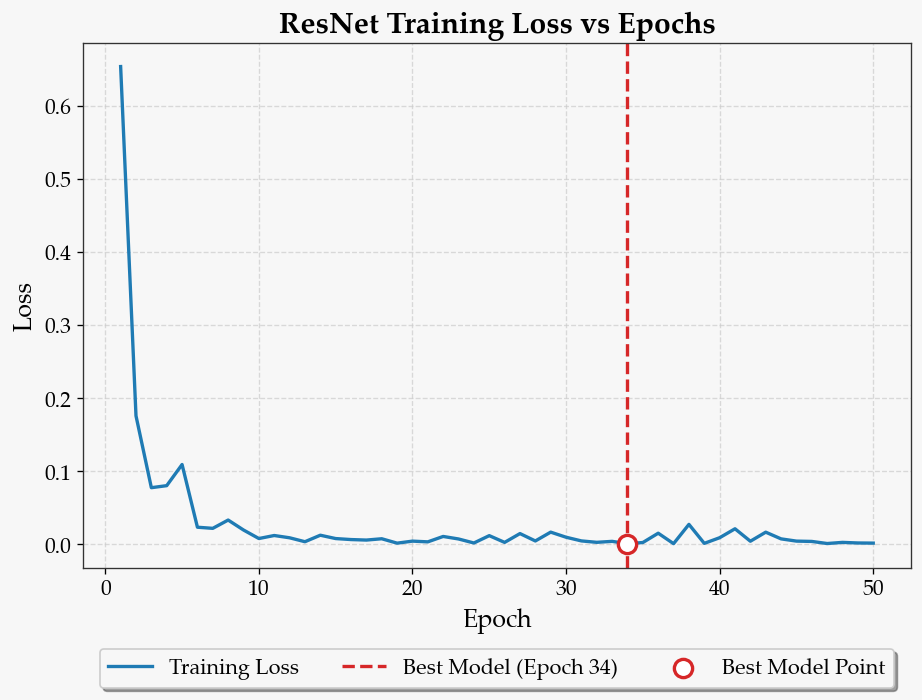

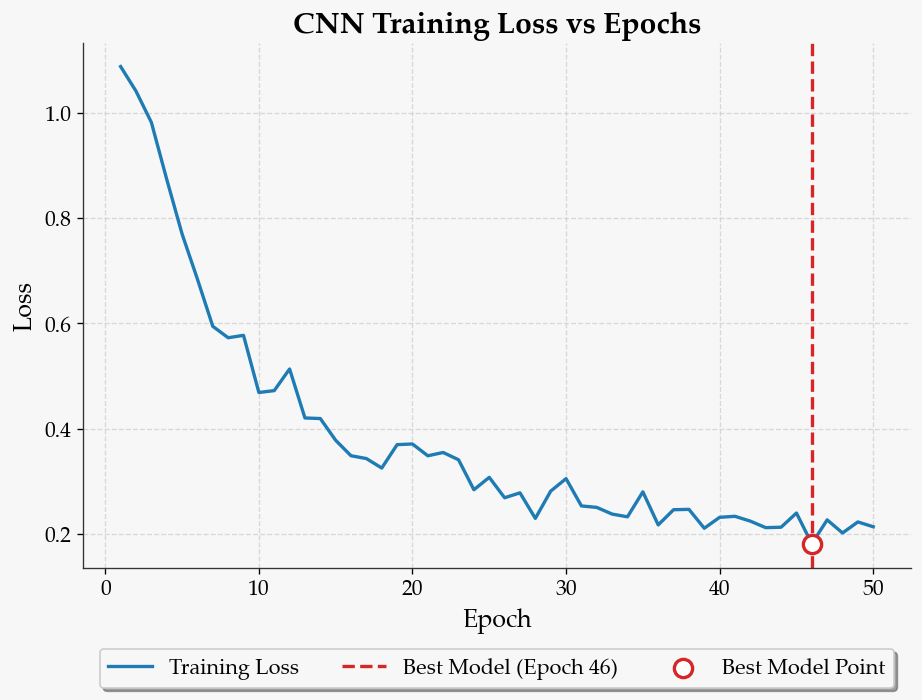

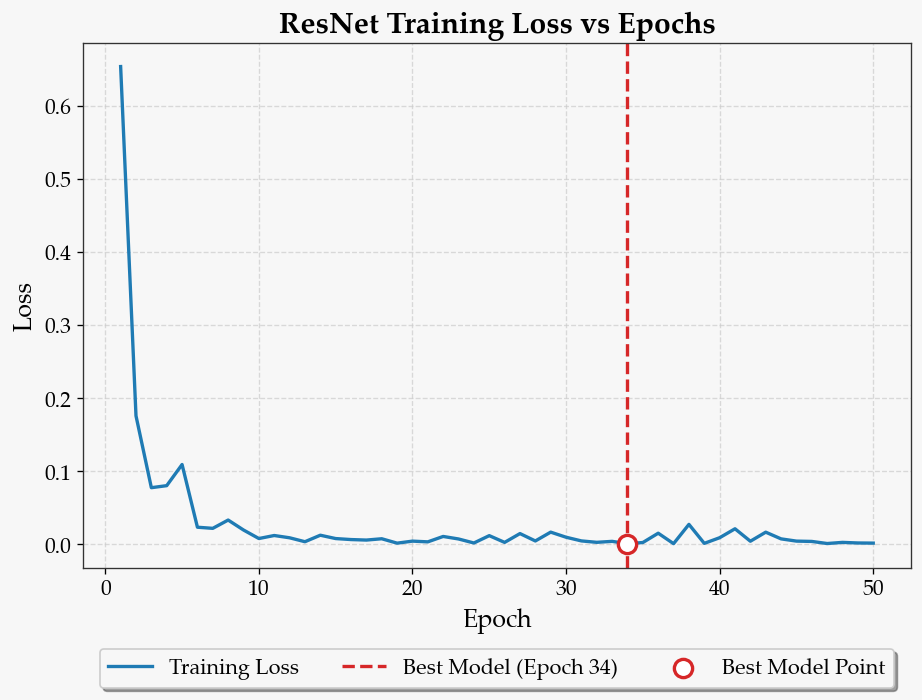

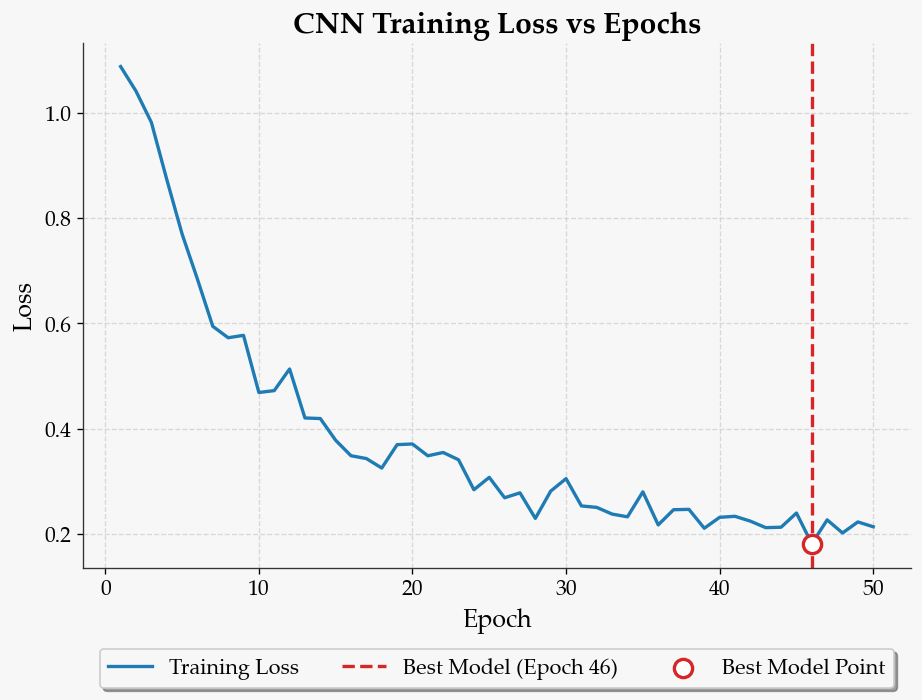

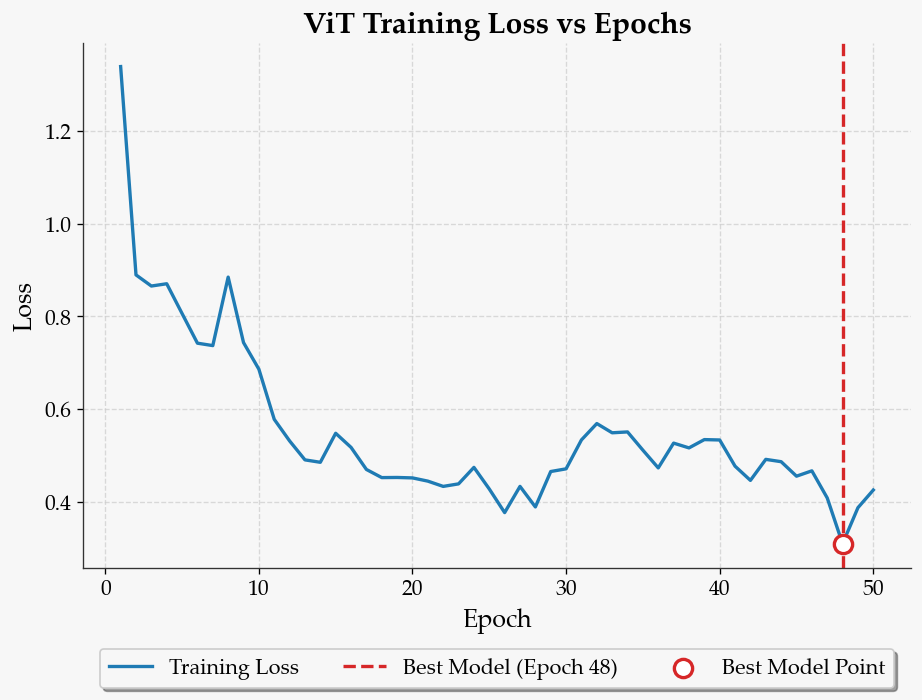

In [53]:


# Save training loss array
np.save('resnet_train_losses.npy', np.array(train_losses))

# Find best epoch (lowest loss)
best_epoch = np.argmin(train_losses)
best_loss = train_losses[best_epoch]

# Plot only loss vs epoch with vertical line at best epoch
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6), dpi=PLOT_DPI)

# Loss plot
ax1.plot(range(1, epochs+1), train_losses, label='Training Loss', color=PLOT_LOSS_COLOR, linestyle=PLOT_LOSS_LINESTYLE, linewidth=PLOT_LINEWIDTH)
ax1.axvline(best_epoch+1, color=PLOT_BEST_EPOCH_COLOR, linestyle=PLOT_BEST_EPOCH_LINESTYLE, linewidth=PLOT_LINEWIDTH, label=f'Best Model (Epoch {best_epoch+1})')

# Draw a circle at the intersection of best model and training loss
ax1.scatter([best_epoch+1], [best_loss], s=PLOT_CIRCLE_SIZE, edgecolor=PLOT_CIRCLE_EDGE_COLOR, facecolor=PLOT_CIRCLE_FACE_COLOR, linewidth=PLOT_CIRCLE_LINEWIDTH, zorder=5, label='Best Model Point')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('ResNet Training Loss vs Epochs', fontweight='bold')
ax1.grid(True, linestyle=PLOT_GRID_LINESTYLE, alpha=0.7)

# Place legend at the bottom, outside the plot
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3, frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

# Save training loss arrays for all models
np.save('resnet_train_losses.npy', np.array(train_losses))
try:
    np.save('vit_train_losses.npy', np.array(vit_train_losses))
except NameError:
    print("ViT training loss not available in this session.")
try:
    np.save('cnn_train_losses.npy', np.array(history.history['loss']))
except Exception:
    print("CNN training loss not available in this session.")

# --- CNN Training Loss Plot ---
try:
    cnn_train_losses = history.history['loss']
    best_cnn_epoch = int(np.argmin(cnn_train_losses))
    best_cnn_loss = cnn_train_losses[best_cnn_epoch]
    np.save('cnn_train_losses.npy', np.array(cnn_train_losses))

    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=PLOT_DPI)
    ax.plot(range(1, len(cnn_train_losses)+1), cnn_train_losses, label='Training Loss', color=PLOT_LOSS_COLOR, linestyle=PLOT_LOSS_LINESTYLE, linewidth=PLOT_LINEWIDTH)
    ax.axvline(best_cnn_epoch+1, color=PLOT_BEST_EPOCH_COLOR, linestyle=PLOT_BEST_EPOCH_LINESTYLE, linewidth=PLOT_LINEWIDTH, label=f'Best Model (Epoch {best_cnn_epoch+1})')
    ax.scatter([best_cnn_epoch+1], [best_cnn_loss], s=PLOT_CIRCLE_SIZE, edgecolor=PLOT_CIRCLE_EDGE_COLOR, facecolor=PLOT_CIRCLE_FACE_COLOR, linewidth=PLOT_CIRCLE_LINEWIDTH, zorder=5, label='Best Model Point')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('CNN Training Loss vs Epochs', fontweight='bold')
    ax.grid(True, linestyle=PLOT_GRID_LINESTYLE, alpha=0.7)
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3, frameon=True, fancybox=True, shadow=True)
    ax.set_facecolor(PLOT_AXES_FACECOLOR)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(PLOT_AXES_EDGECOLOR)
    ax.spines['bottom'].set_color(PLOT_AXES_EDGECOLOR)
    plt.tight_layout()
    plt.show()
except Exception:
    print("CNN training loss not available for plotting.")

# --- ViT Training Loss Plot ---
try:
    best_vit_epoch = int(np.argmin(vit_train_losses))
    best_vit_loss = vit_train_losses[best_vit_epoch]
    np.save('vit_train_losses.npy', np.array(vit_train_losses))

    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=PLOT_DPI)
    ax.plot(range(1, len(vit_train_losses)+1), vit_train_losses, label='Training Loss', color=PLOT_LOSS_COLOR, linestyle=PLOT_LOSS_LINESTYLE, linewidth=PLOT_LINEWIDTH)
    ax.axvline(best_vit_epoch+1, color=PLOT_BEST_EPOCH_COLOR, linestyle=PLOT_BEST_EPOCH_LINESTYLE, linewidth=PLOT_LINEWIDTH, label=f'Best Model (Epoch {best_vit_epoch+1})')
    ax.scatter([best_vit_epoch+1], [best_vit_loss], s=PLOT_CIRCLE_SIZE, edgecolor=PLOT_CIRCLE_EDGE_COLOR, facecolor=PLOT_CIRCLE_FACE_COLOR, linewidth=PLOT_CIRCLE_LINEWIDTH, zorder=5, label='Best Model Point')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('ViT Training Loss vs Epochs', fontweight='bold')
    ax.grid(True, linestyle=PLOT_GRID_LINESTYLE, alpha=0.7)
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3, frameon=True, fancybox=True, shadow=True)
    ax.set_facecolor(PLOT_AXES_FACECOLOR)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(PLOT_AXES_EDGECOLOR)
    ax.spines['bottom'].set_color(PLOT_AXES_EDGECOLOR)
    plt.tight_layout()
    plt.show()
except Exception:
    print("ViT training loss not available for plotting.")